In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
1240/683

1.8155197657393851

In [ ]:
# read H2 broad middle.txt
def read_spectrum(filename):
  f = open(filename, "r")
  str_data = f.read()
  str_data = str_data.split("\n")
  str_data = str_data[13:-1]
  data = np.array([[float(i.split('\t')[0]), float(i.split('\t')[1])] for i in str_data])
  f.close()
  data = pd.DataFrame(data, columns=['wavelength', 'intensity'])

  # convert data to eV
  data['wavelength'] = 1240/data['wavelength']
  # rename wavelength to eV
  data = data.rename(columns={'wavelength': 'eV'})
  return data.iloc[1:].reset_index(drop=True)

data = read_spectrum('H2 broad middle 410 (415) peak.txt')


In [ ]:
H2_lines = np.array([410, 434, 486, 656])
H2_lines_ev = 1240/H2_lines
H2_lines_ev

array([3.02439024, 2.85714286, 2.55144033, 1.8902439 ])

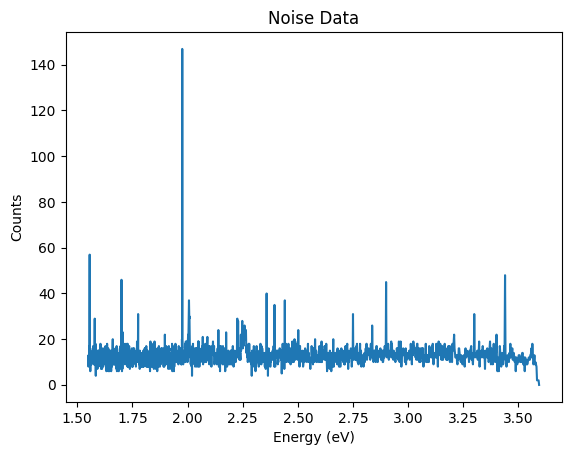

12.892613580850025

In [ ]:
noise = read_spectrum('noise 410 peak.txt')
# mask = noise['intensity'] > 20

# constant_noise = np.array([(noise['intensity'][i]-12.04)*mask[i] for i in range(len(mask))])
# noise['intensity'] -= constant_noise
plt.plot(noise['eV'], noise['intensity'])
# make title called noise data
plt.title('Noise Data')
# make y axis called counts and make x axis called energy
plt.ylabel('Counts')
plt.xlabel('Energy (eV)')
plt.show()
np.mean(noise['intensity'])

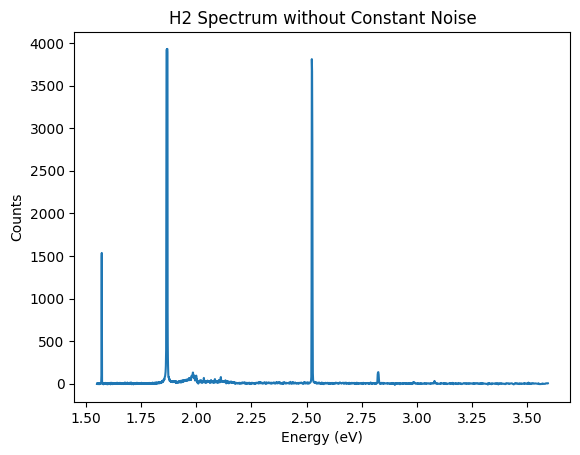

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

data = read_spectrum('H2 broad middle 410 (415) peak.txt')
noise = read_spectrum('noise 410 peak.txt')
# fig = px.line(data, x='eV', y='intensity', title='H2 spectrum')
#fig = go.Figure()
data['intensity'] -= noise["intensity"]

# overlay the intensity plot again
#fig.add_trace(go.Scatter(x=data['eV'], y=data['intensity'], mode='lines', name='filtered'))
#fig.add_trace(go.Scatter(x=noise['eV'], y=noise['intensity'], mode='lines', name='noise'))

# draw vertical lines on the graph for the H2 ev line positions
#fig.add_trace(go.Scatter(x=H2_lines_ev, y=[0]*len(H2_lines_ev), mode='markers', name='H2 lines'))

#fig.show()

# do the same thing but with matplotlib
plt.plot(data['eV'], data['intensity'])
plt.title('H2 Spectrum without Constant Noise')
plt.ylabel('Counts')
plt.xlabel('Energy (eV)')
plt.show()

In [ ]:
from scipy.optimize import curve_fit

def gaussian(x, a, mu, sigma, offset):
    return a * np.exp(-(x - mu)**2 / (2 * sigma**2)) + offset

def fit_gaussian(data, range, guess=None):
    x = data['eV']
    y = data['intensity']

    # cutoff data so that it is in between the range
    y = y[(x > range[0]) & (x < range[1])]
    x = x[(x > range[0]) & (x < range[1])]

    xscale = range[1] - range[0]
    x = (x - range[0]/2 - range[1]/2)/xscale

    yscale = np.max(y)
    y = y/yscale

    # fit the gaussian
    if guess is not None:
        popt, pcov = curve_fit(gaussian, x, y, p0=guess)
    else:
        popt, pcov = curve_fit(gaussian, x, y)
    popt[0] *= yscale
    popt[1] *= xscale
    popt[1] += (range[0]+range[1])/2
    popt[2] *= xscale
    popt[2] = np.abs(popt[2])
    popt[3] *= yscale
    return popt, pcov

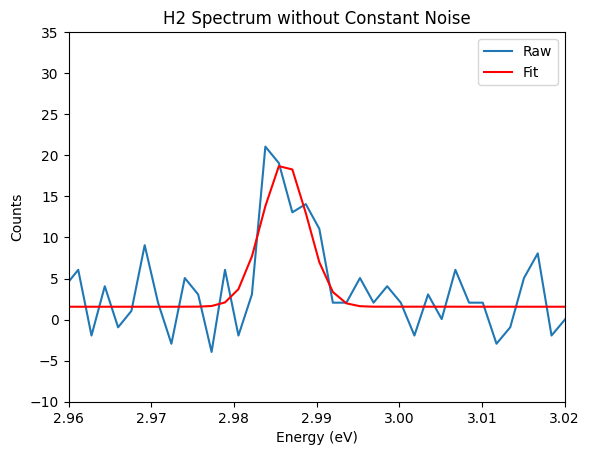

In [ ]:
data410 = read_spectrum('H2 broad middle 410 (415) peak.txt')
noise410 = read_spectrum('noise 410 peak.txt')
data410['intensity'] -= noise410['intensity']

popt, pcov = fit_gaussian(data410, [2.98, 2.997])
# plot this data with matplotlib but only in the range of 2.96 to 3.02 in the x range
plt.plot(data410['eV'], data410['intensity'], label="Raw")
plt.title('H2 Spectrum without Constant Noise')
plt.ylabel('Counts')
plt.xlabel('Energy (eV)')
plt.xlim(2.96, 3.02)
plt.ylim(-10, 35)
# plot the fitted function as well
plt.plot(data410['eV'], gaussian(data410['eV'], *popt), 'r',label = "Fit")
#add label to lines

plt.legend()
plt.show()


#fig = go.Figure()

#fig.add_trace(go.Scatter(x=data410['eV'], y=data410['intensity'], mode='lines', name='filtered'))
#fig.add_trace(go.Scatter(x=data410['eV'], y=gaussian(data410['eV'], *popt), mode='lines', name='fit'))


<ipython-input-51-367c20463f02>:15: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



Text(0.5, 0, 'Energy (eV)')

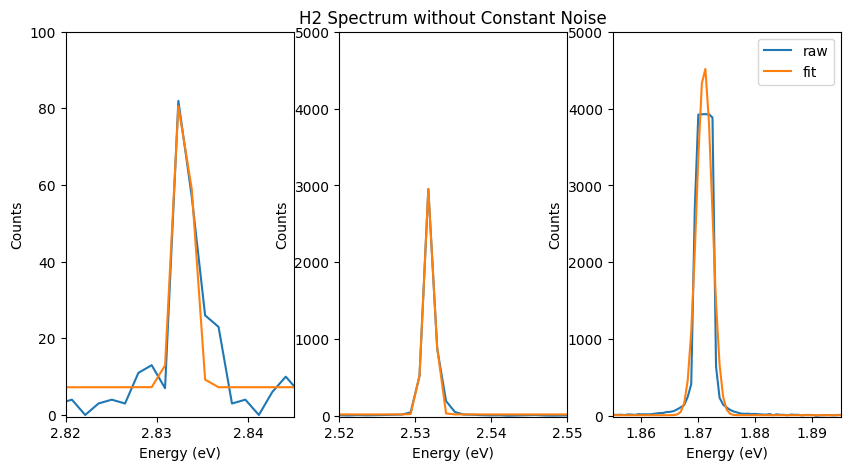

In [ ]:
data = read_spectrum('tube1 H2 broad middle.txt')
noise = read_spectrum('noise broad.txt')
data['intensity'] -= noise['intensity']

#fig = go.Figure()

 # intensity plot
#fig.add_trace(go.Scatter(x=data['eV'], y=data['intensity'], mode='lines', name='filtered'))

# fit [2.82-2.845]
popt0, pcov0 = fit_gaussian(data, [2.82, 2.845])
#create 3 subplots with matplotlib
fig, axs = plt.subplots(3, 1, figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.xlim(2.82, 2.845)
plt.ylim(-.5,100)
plt.plot(data['eV'], data['intensity'])
plt.plot(data['eV'], gaussian(data['eV'], *popt0))

plt.ylabel('Counts')
plt.xlabel('Energy (eV)')


#fig.add_trace(go.Scatter(x=data['eV'], y=gaussian(data['eV'], *popt0), mode='lines', name='fit0'))

# fit [1.85-1.89]
popt1, pcov1 = fit_gaussian(data, [2.52, 2.55])
#fig.add_trace(go.Scatter(x=data['eV'], y=gaussian(data['eV'], *popt1), mode='lines', name='fit1'))
plt.subplot(1, 3, 2)
plt.xlim(2.52, 2.55)
plt.ylim(-10,5000)
plt.plot(data['eV'], data['intensity'])
plt.plot(data['eV'], gaussian(data['eV'], *popt1))
plt.title('H2 Spectrum without Constant Noise')
plt.ylabel('Counts')
plt.xlabel('Energy (eV)')
# fit [1.85-1.89]
popt2, pcov2 = fit_gaussian(data, [1.855, 1.89])
#fig.add_trace(go.Scatter(x=data['eV'], y=gaussian(data['eV'], *popt2), mode='lines', name='fit2'))
plt.subplot(1, 3, 3)
plt.xlim(1.855, 1.895)
plt.ylim(-10,5000)
plt.plot(data['eV'], data['intensity'],label='raw')
plt.plot(data['eV'], gaussian(data['eV'], *popt2),label='fit')
plt.legend()

plt.ylabel('Counts')
plt.xlabel('Energy (eV)')

# make the plot not as tall



In [ ]:
data = read_spectrum('D2 broad middle high int.txt')
noise = read_spectrum('noise broad.txt')
data['intensity'] -= noise['intensity']

fig = go.Figure()

# intensity plot
fig.add_trace(go.Scatter(x=data['eV'], y=data['intensity'], mode='lines', name='filtered'))

# fit [2.985, 3.005]
popt3, pcov3 = fit_gaussian(data, [2.99, 3.007])
fig.add_trace(go.Scatter(x=data['eV'], y=gaussian(data['eV'], *popt3), mode='lines', name='fit3'))

# fit [2.82, 2.85]
popt4, pcov4 = fit_gaussian(data, [2.82, 2.85])
fig.add_trace(go.Scatter(x=data['eV'], y=gaussian(data['eV'], *popt4), mode='lines', name='fit4'))


In [ ]:
data = read_spectrum('D2 broad middle low int.txt')
noise = read_spectrum('noise broad.txt')
data['intensity'] -= noise['intensity']

fig = go.Figure()

# intensity plot
fig.add_trace(go.Scatter(x=data['eV'], y=data['intensity'], mode='lines', name='filtered'))

# fit [2.52, 2.545]
popt5, pcov5 = fit_gaussian(data, [2.52, 2.545])
fig.add_trace(go.Scatter(x=data['eV'], y=gaussian(data['eV'], *popt5), mode='lines', name='fit5'))

# fit [2.82, 2.85]
popt6, pcov6 = fit_gaussian(data, [1.85, 1.89])
fig.add_trace(go.Scatter(x=data['eV'], y=gaussian(data['eV'], *popt6), mode='lines', name='fit6'))

Text(0, 0.5, 'Counts')

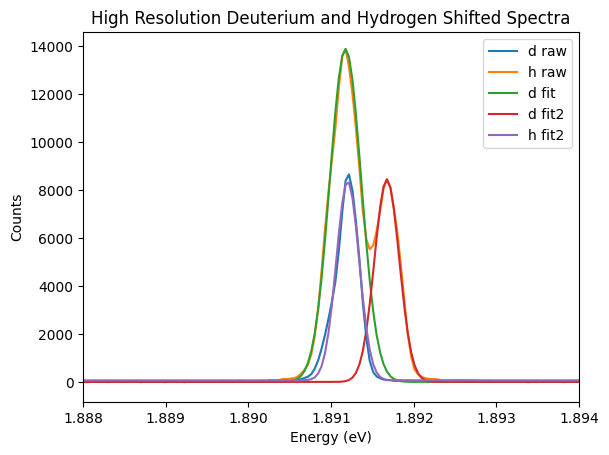

In [ ]:
h2_data_hires = read_spectrum('H2 hi-res middle.txt')
data_hires = read_spectrum('D2 hi-res middle.txt')
noise_hires = read_spectrum('noise hi-res.txt')
data_hires['intensity'] -= noise_hires['intensity']

# fig = go.Figure()

# # intensity plot
# fig.add_trace(go.Scatter(x=h2_data_hires['eV'], y=h2_data_hires['intensity'], mode='lines', name='hi-res'))
# fig.add_trace(go.Scatter(x=data_hires['eV'], y=data_hires['intensity'], mode='lines', name='hi-res'))

# create a plot with matplotlib
plt.plot(h2_data_hires['eV'], h2_data_hires['intensity'], label='d raw')
plt.plot(data_hires['eV'], data_hires['intensity'], label='h raw')
popt7 = [13883.15, 1.891174, .00019, 0]
plt.plot(h2_data_hires['eV'], gaussian(h2_data_hires['eV'], *popt7), label='d fit')
popt8 = [8441.15, 1.891674, .00015, 0]
plt.plot(data_hires['eV'], gaussian(data_hires['eV'], *popt8), label='d fit2')
popt9, pcov9 = fit_gaussian(h2_data_hires, [1.89, 1.893])
plt.plot(h2_data_hires['eV'], gaussian(h2_data_hires['eV'], *popt9), label='h fit2')
plt.legend()
plt.xlim(1.888,1.894)
plt.title("High Resolution Deuterium and Hydrogen Shifted Spectra")
plt.xlabel("Energy (eV)")
plt.ylabel("Counts")


# # gaussian guess
# popt7 = [13883.15, 1.891174, .00019, 0]
# fig.add_trace(go.Scatter(x=data_hires['eV'], y=gaussian(data_hires['eV'], *popt7), mode='lines', name='fit7'))




# popt8 = [8441.15, 1.891674, .00015, 0]
# fig.add_trace(go.Scatter(x=data_hires['eV'], y=gaussian(data_hires['eV'], *popt8), mode='lines', name='fit8'))


# # fit for h2 hi res
# popt9, pcov9 = fit_gaussian(h2_data_hires, [1.89, 1.893])
# fig.add_trace(go.Scatter(x=h2_data_hires['eV'], y=gaussian(h2_data_hires['eV'], *popt9), mode='lines', name='fit9'))





In [ ]:
# all means and standard deviations
mus_h2 = np.array([popt[1], popt0[1], popt1[1], popt2[1]])
stds_h2 = np.array([popt[2], popt0[2], popt1[2], popt2[2]])

mus_d2 = np.array([popt3[1], popt4[1], popt5[1], popt6[1]])
stds_d2 = np.array([popt3[2], popt4[2], popt5[2], popt6[2]])

h2_df = pd.DataFrame({'mu': mus_h2, 'std': stds_h2})
d2_df = pd.DataFrame({'mu': mus_d2, 'std': stds_d2})

# format h2_df as a latex table with one column with values mean \pm std
h2_df['mu'] = h2_df['mu'].apply(lambda x: f"{x:.5f}")
h2_df['std'] = h2_df['std'].apply(lambda x: f"{x:.5f}")
h2_df['mu_std'] = h2_df['mu'] + ' \pm ' + h2_df['std']

# print as latex table
print(h2_df['mu_std'].to_latex(index=False))

d2_df['mu'] = d2_df['mu'].apply(lambda x: f"{x:.5f}")
d2_df['std'] = d2_df['std'].apply(lambda x: f"{x:.5f}")
d2_df['mu_std'] = d2_df['mu'] + ' \pm ' + d2_df['std']

# print as latex table
print(d2_df['mu_std'].to_latex(index=False))

\begin{tabular}{l}
\toprule
mu_std \\
\midrule
2.98615 \pm 0.00272 \\
2.83292 \pm 0.00086 \\
2.53184 \pm 0.00067 \\
1.87108 \pm 0.00136 \\
\bottomrule
\end{tabular}

\begin{tabular}{l}
\toprule
mu_std \\
\midrule
2.99783 \pm 0.00277 \\
2.83467 \pm 0.00265 \\
2.53140 \pm 0.00220 \\
1.87114 \pm 0.00155 \\
\bottomrule
\end{tabular}

